# Day 08. Exercise 04
# Regression

## 0. Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [5]:
df = pd.read_csv("../data/checker_regression.csv")
df.fillna(0, inplace=True)
df.head()

,uid,num_commits,pageviews,AVG(diff)
0,user_1,62,28.0,0.0
1,user_1,62,28.0,0.0
2,user_1,62,28.0,0.0
3,user_1,62,28.0,0.0
4,user_1,62,28.0,0.0


In [6]:
X = df.drop('AVG(diff)', axis=1)
y = df['AVG(diff)']
X = df.drop('AVG(diff)', axis=1)
y = df['AVG(diff)']

In [7]:
encoder = OneHotEncoder(sparse_output=False)
uid_encoded = encoder.fit_transform(X[['uid']])
uid_feature_names = encoder.get_feature_names_out(['uid'])
uid_df = pd.DataFrame(uid_encoded, columns=uid_feature_names, index=X.index)
X = pd.concat([uid_df, X[['num_commits', 'pageviews']]], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

In [9]:
def crossval(n_splits, X, y, model_factory):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    test_rmse_list = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = model_factory()
        model.fit(X_train, y_train)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        rmse_train = root_mean_squared_error(y_train, train_pred)
        rmse_test = root_mean_squared_error(y_test, test_pred)

        test_rmse_list.append(rmse_test)
        print(f"train -  {rmse_train}   |   test -  {rmse_test}")

    avg_rmse = np.mean(test_rmse_list)
    print(f"Average RMSE on crossval is {avg_rmse}")
    return avg_rmse

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [10]:
crossval(10, X, y, lambda: LinearRegression())

train -  3.262249194680208e-13   |   test -  58.81175625874994
train -  3.354232374030562e-12   |   test -  8.039892494708347
train -  3.34055932271238e-12   |   test -  1.895678216445376e-12
train -  2.9809939422207407e-13   |   test -  28.212594735012935
train -  4.109211180806853e-12   |   test -  25.46715402663242
train -  6.613318164610436e-13   |   test -  26.28129359315969
train -  6.657935941748163e-13   |   test -  30.394907178371817
train -  6.577516296675635e-13   |   test -  16.62403315160394
train -  3.6242469959424915e-13   |   test -  43.574144978454925
train -  4.3967398830623267e-13   |   test -  57.087322578548964
Average RMSE on crossval is 29.449309899524486


np.float64(29.449309899524486)

In [11]:
crossval(10, X, y, lambda: DecisionTreeRegressor(max_depth=5, random_state=21))

train -  15.74953691985481   |   test -  56.87828373501169
train -  16.888512661077694   |   test -  11.54351820287039
train -  17.265472127276965   |   test -  0.0
train -  15.064624144701321   |   test -  40.10945365150493
train -  18.22333060164777   |   test -  27.02474410221444
train -  18.645877697486505   |   test -  24.434618752194368
train -  18.333987215685138   |   test -  25.68866305077825
train -  10.095471403413654   |   test -  38.835849601698094
train -  5.489697963472921   |   test -  79.87275185002228
train -  15.089544136981235   |   test -  60.336846492362
Average RMSE on crossval is 36.47247294386564


np.float64(36.47247294386564)

In [12]:
crossval(10, X, y, lambda: RandomForestRegressor(n_estimators=100, max_depth=20, random_state=21))

train -  11.534104599361742   |   test -  56.46084165375148
train -  13.873114652892566   |   test -  9.859071998953794
train -  13.490352124240129   |   test -  0.0
train -  14.059319510052688   |   test -  30.78577933703952
train -  12.739899142909167   |   test -  26.19790315307803
train -  14.916529603423927   |   test -  34.702561649161986
train -  14.491553417952746   |   test -  18.969864797737603
train -  14.041617610356568   |   test -  33.153909678950356
train -  13.44730780789071   |   test -  48.429258948015814
train -  12.26576122638535   |   test -  55.70772941019662
Average RMSE on crossval is 31.426692062688524


np.float64(31.426692062688524)

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

In [14]:
tree_model = DecisionTreeRegressor(max_depth=5, random_state=21)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [15]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=21)
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)

2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

In [16]:
def plot_preds(y_true, y_pred, title):
    plt.figure(figsize=(15, 8))
    plt.scatter(y_true, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r', label='Ideal fit')
    plt.xlabel('Actual AVG(diff)')
    plt.ylabel('Predicted AVG(diff)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

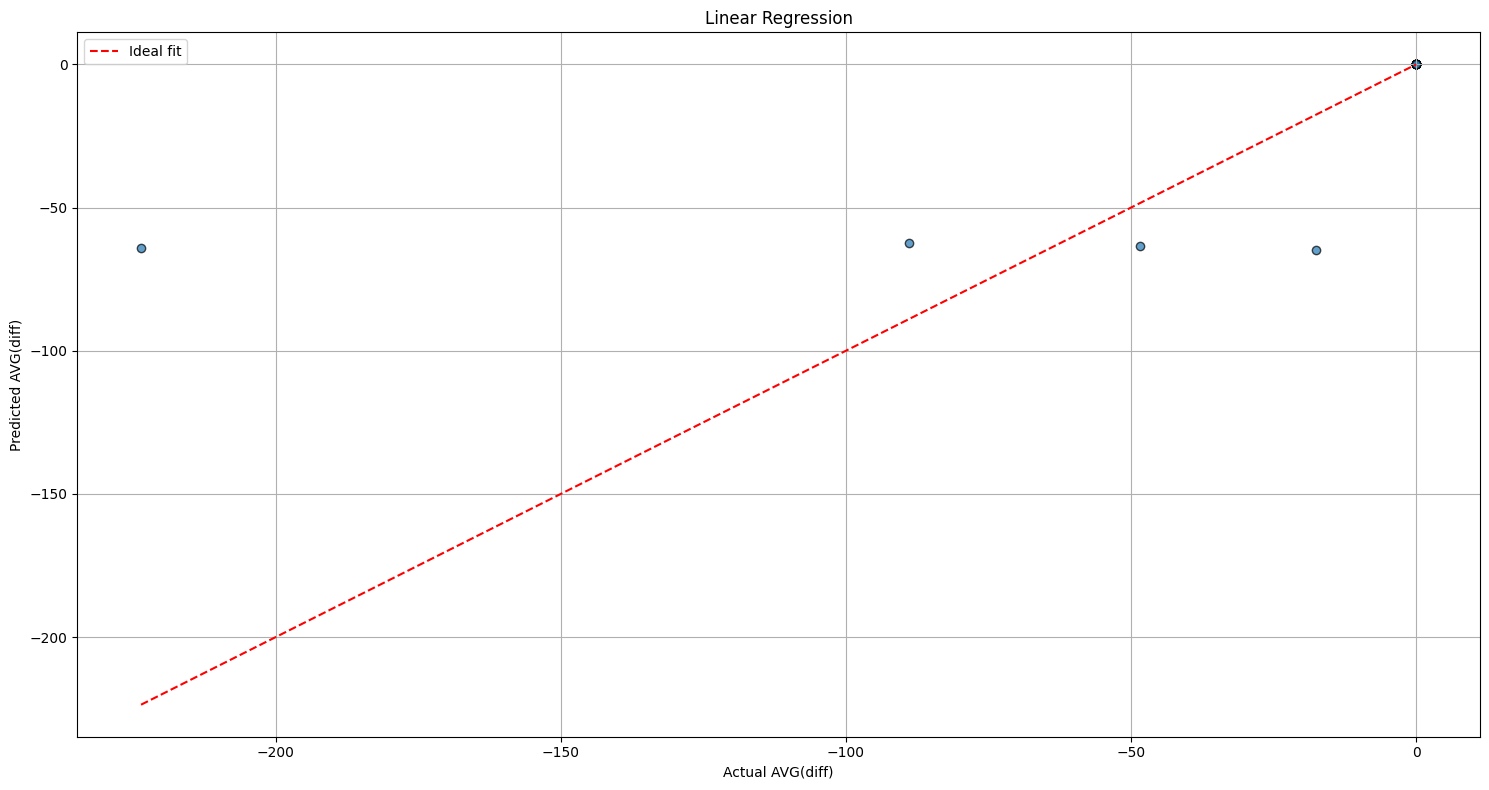

In [17]:
plot_preds(y_test, linear_preds, "Linear Regression")

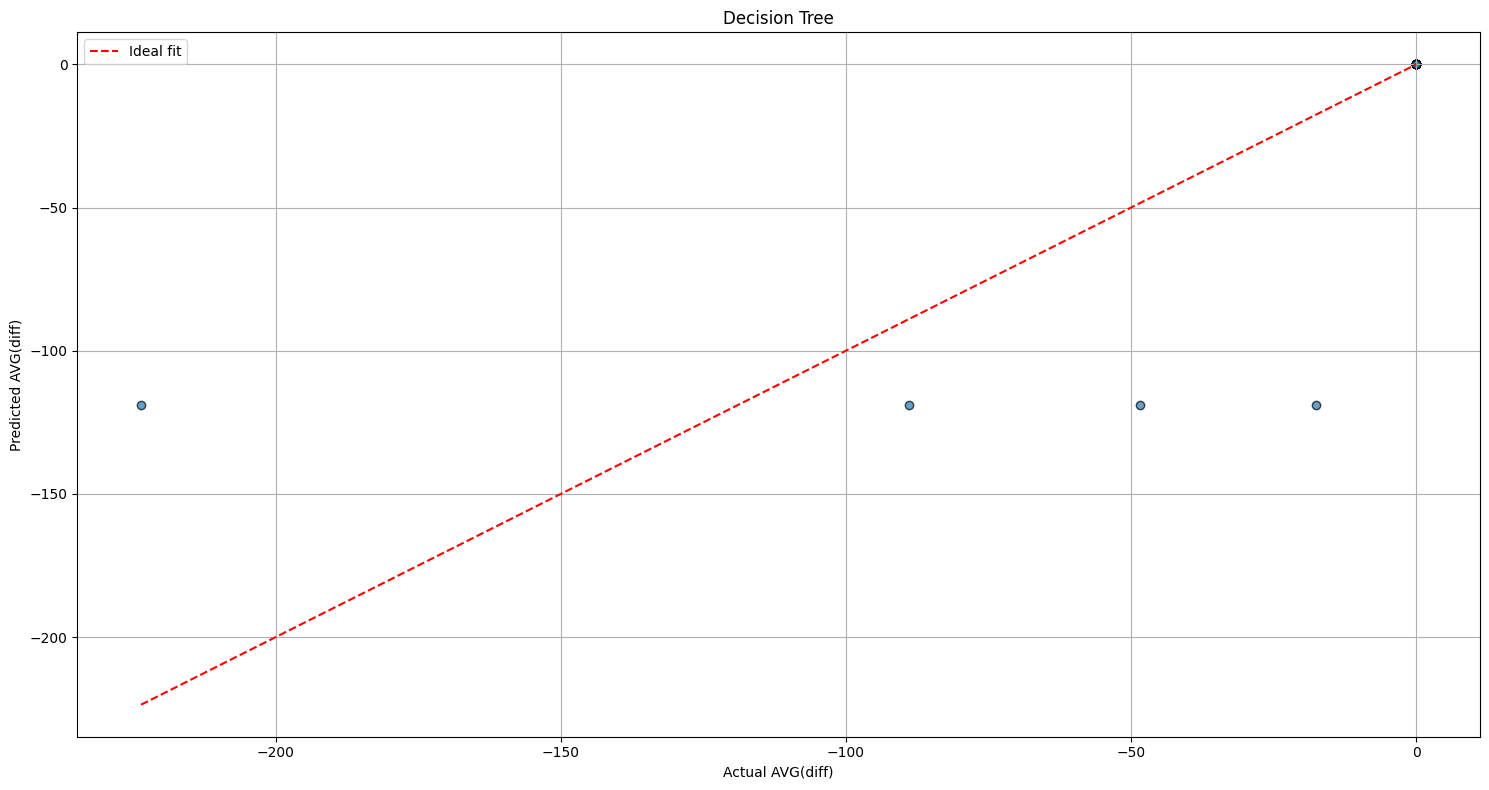

In [18]:
plot_preds(y_test, tree_preds, "Decision Tree")

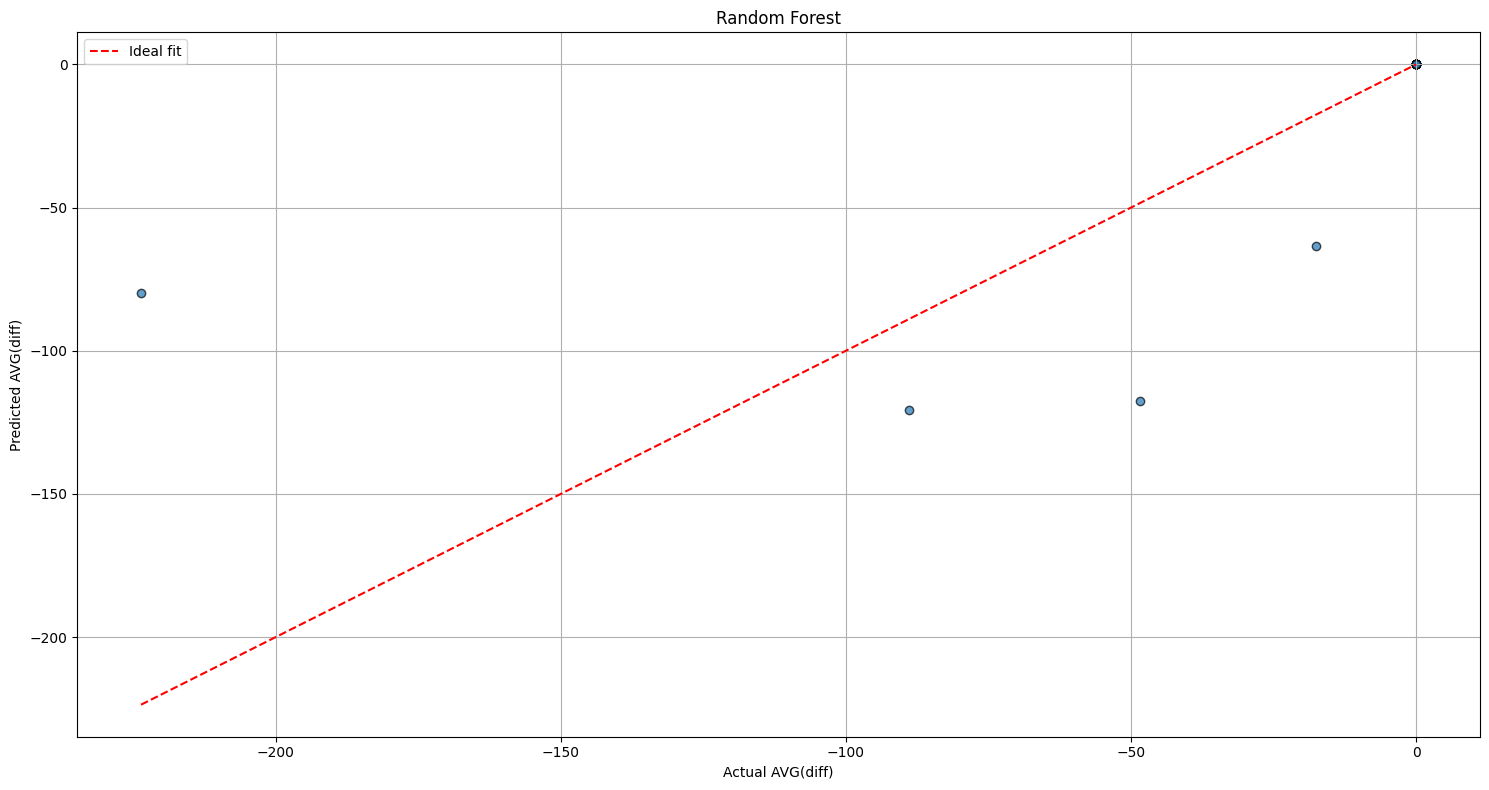

In [19]:
plot_preds(y_test, forest_preds, "Random Forest")

ANSWER: все точки были бы на линии